In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/metro-transit-data/country_city.csv
/kaggle/input/metro-transit-data/upcoming_city.csv
/kaggle/input/metro-transit-data/metro_country.csv


In [2]:
df=pd.read_csv('/kaggle/input/metro-transit-data/country_city.csv')
df

,City,Flag URL,Country,Name,Service opened,Last expanded,Stations,Lines,System length( km),Annual ridership (millions)
0,Algiers,https://upload.wikimedia.org/wikipedia/commons...,Algeria,Algiers Metro,2011,2018,19,1,18.50,45.30
1,Buenos Aires,https://upload.wikimedia.org/wikipedia/commons...,Argentina,Buenos Aires Underground,1913,2019,78,7,56.70,236.00
2,Yerevan,https://upload.wikimedia.org/wikipedia/commons...,Armenia,Yerevan Metro,1981,1996,10,1,12.10,23.30
3,Sydney,https://upload.wikimedia.org/wikipedia/commons...,Australia,Sydney Metro,2019,2024,21,1,52.00,39.70
4,Vienna,https://upload.wikimedia.org/wikipedia/commons...,Austria,Vienna U-Bahn,1978,2017,98,5,83.30,459.80
...,...,...,...,...,...,...,...,...,...,...
221,Tashkent,https://upload.wikimedia.org/wikipedia/commons...,Uzbekistan,Tashkent Metro,1977,2023,48,4,66.50,136.70
222,Caracas,https://upload.wikimedia.org/wikipedia/commons...,Venezuela,Caracas Metro,1983,2015,49,5,67.20,358.00
223,Valencia,https://upload.wikimedia.org/wikipedia/commons...,Venezuela,Metro Valencia,2006,–,30,4,32.46,NaN
224,Hanoi,https://upload.wikimedia.org/wikipedia/commons...,Vietnam,Hanoi Metro,2021,2024,20,2,21.60,10.70


In [3]:
df.isnull().sum()

City                            2
Flag URL                        0
Country                         0
Name                            0
Service opened                  0
Last expanded                   0
Stations                        0
Lines                           0
System length( km)              0
Annual ridership (millions)    16
dtype: int64

In [4]:
df['City'].unique()

array(['Algiers', 'Buenos Aires', 'Yerevan', 'Sydney', 'Vienna', 'Baku',
       'Dhaka', 'Minsk', 'Brussels', 'Belo Horizonte', 'Brasília',
       'Fortaleza', 'Porto Alegre', 'Recife', 'Rio de Janeiro',
       'Salvador', 'São Paulo', 'Sofia', 'Montreal', 'Toronto',
       'Vancouver', 'Santiago', 'Beijing', 'Changchun', 'Changsha',
       'Changzhou', 'Chengdu', 'Chongqing', 'Dalian', 'Dongguan',
       'Foshan', 'Fuzhou', 'Guangzhou', 'Guiyang', 'Hangzhou', 'Harbin',
       'Hefei', 'Hohhot', 'Hong Kong', 'Jinan', 'Jinhua', 'Kunming',
       'Lanzhou', 'Luoyang', 'Macau', 'Nanchang', 'Nanjing', 'Nanning',
       'Nantong', 'Ningbo', 'Qingdao', 'Shanghai', 'Shaoxing', 'Shenyang',
       'Shenzhen', 'Shijiazhuang', 'Suzhou', 'Taiyuan', 'Taizhou',
       'Tianjin', 'Ürümqi', 'Wenzhou', 'Wuhan', 'Wuhu', 'Wuxi', 'Xiamen',
       "Xi'an", 'Xuzhou', 'Zhengzhou', 'Medellín', 'Prague', 'Copenhagen',
       'Santo Domingo', 'Quito', 'Cairo', 'Helsinki', 'Lille', 'Lyon',
       'Marseille', 'P

In [5]:
df['Country'].unique()

array(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'China', 'Colombia',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Finland', 'France', 'Georgia', 'Germany', 'Greece',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Italy', 'Japan',
       'Kazakhstan', 'North Korea', 'South Korea', 'Malaysia', 'Mexico',
       'Netherlands', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Singapore', 'Spain', 'Sweden', 'Switzerland',
       'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uzbekistan', 'Venezuela',
       'Vietnam'], dtype=object)

### Visualiazation of Metro Network Across India

In [6]:
indian_cities=df.loc[df['Country']=="India"]
indian_cities

,City,Flag URL,Country,Name,Service opened,Last expanded,Stations,Lines,System length( km),Annual ridership (millions)
91,Agra,https://upload.wikimedia.org/wikipedia/en/thum...,India,Agra Metro,2024,–,6,1,5.200,NaN
92,Ahmedabad,https://upload.wikimedia.org/wikipedia/en/thum...,India,Ahmedabad Metro,2019,2024,38,2,58.660,29.35
93,Bangalore,https://upload.wikimedia.org/wikipedia/en/thum...,India,Namma Metro,2011,2024,69,2,76.950,232.80
94,Chennai,https://upload.wikimedia.org/wikipedia/en/thum...,India,Chennai Metro,2015,2022,42,2,54.100,91.10
95,NaN,https://upload.wikimedia.org/wikipedia/en/thum...,India,Chennai MRTS,1995,2007,18,1,19.340,36.50
96,Delhi,https://upload.wikimedia.org/wikipedia/en/thum...,India,Delhi Metro,2002,2023,231,10,353.000,2032.00
97,Gurgaon,https://upload.wikimedia.org/wikipedia/en/thum...,India,Rapid Metro Gurgaon,2013,2017,11,1,12.854,14.60
98,Hyderabad,https://upload.wikimedia.org/wikipedia/en/thum...,India,Hyderabad Metro,2017,2020,57,3,71.160,162.06
99,Jaipur,https://upload.wikimedia.org/wikipedia/en/thum...,India,Jaipur Metro,2015,2020,11,1,11.979,18.12
100,Kanpur,https://upload.wikimedia.org/wikipedia/en/thum...,India,Kanpur Metro,2021,–,9,1,8.980,NaN


In [7]:
count_cities = df.loc[df['Country'] == "India", 'City'].nunique()
count_cities

17

In [8]:
max_lines = indian_cities['Lines'].max()
max_lines

10

In [9]:
indian_cities['System length( km)'].min()

5.2

In [10]:
indian_cities['System length( km)'].max()

353.0

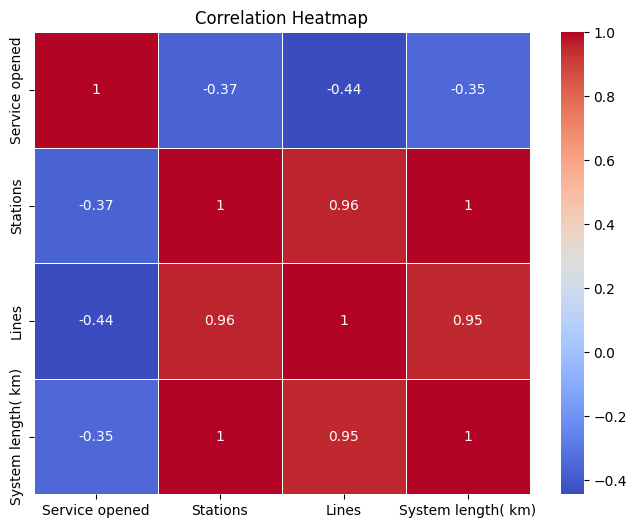

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(indian_cities.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

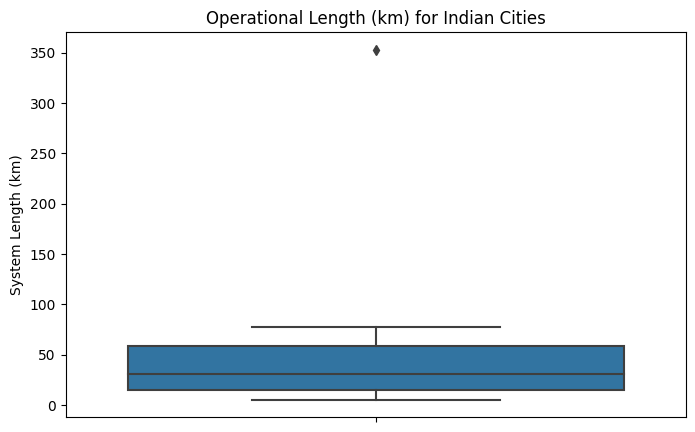

In [12]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=indian_cities["System length( km)"])
plt.title("Operational Length (km) for Indian Cities")
plt.ylabel("System Length (km)")
plt.show()

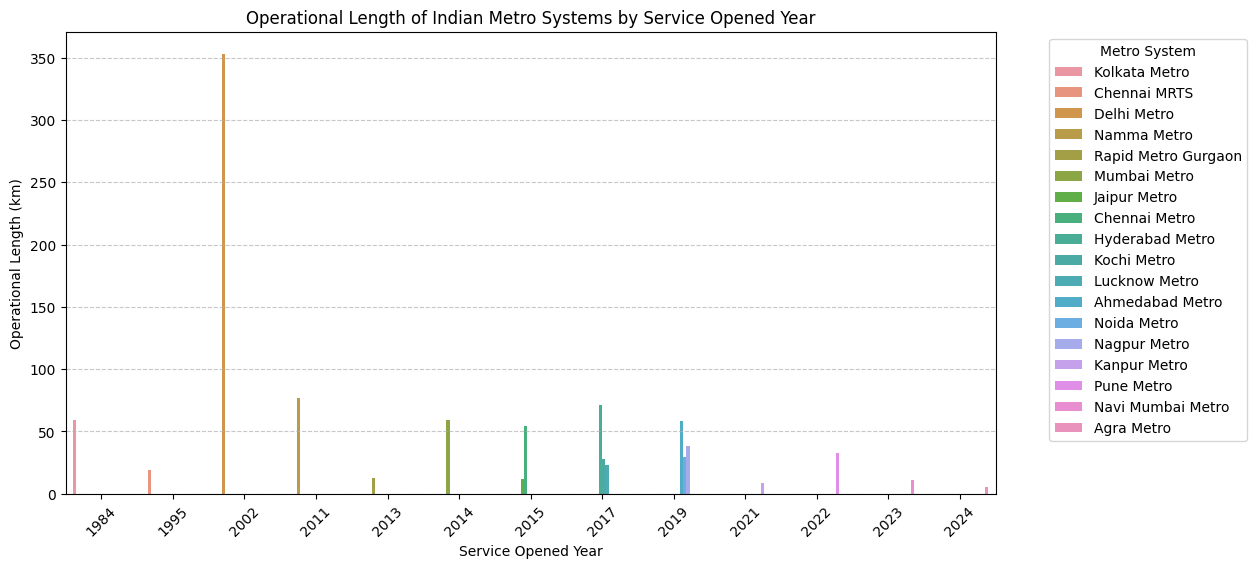

In [13]:
# Select relevant columns and drop NaN values
plot_data = indian_cities[["Name", "Service opened", "System length( km)"]].dropna()

# Sort by Service opened for better visualization
plot_data = plot_data.sort_values(by="Service opened")

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=plot_data["Service opened"], y=plot_data["System length( km)"], hue=plot_data["Name"])
plt.xlabel("Service Opened Year")
plt.ylabel("Operational Length (km)")
plt.title("Operational Length of Indian Metro Systems by Service Opened Year")
plt.legend(title="Metro System", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

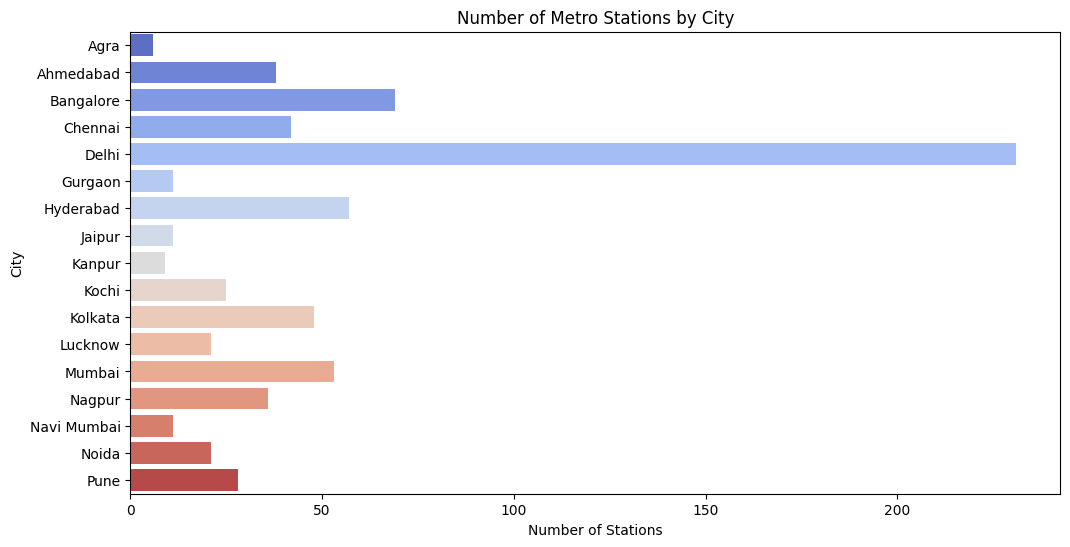

In [14]:
# 1. Bar Chart: City vs. Number of Stations
plt.figure(figsize=(12, 6))
sns.barplot(x="Stations", y="City", data=indian_cities, palette="coolwarm")
plt.xlabel("Number of Stations")
plt.ylabel("City")
plt.title("Number of Metro Stations by City")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


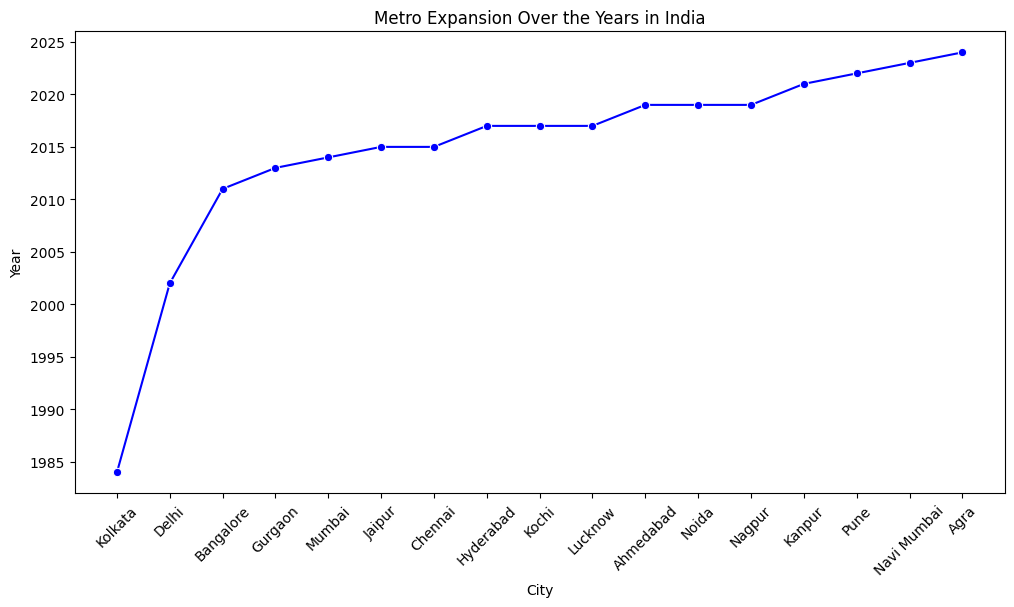

In [15]:
df_sorted = indian_cities.sort_values("Service opened")

# Creating a Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(y=df_sorted["Service opened"], x=df_sorted["City"], marker="o", color="blue")

# Labels and Title
plt.xlabel("City")
plt.ylabel("Year")
plt.title("Metro Expansion Over the Years in India")
plt.xticks(rotation=45)
# Show the plot
plt.show()

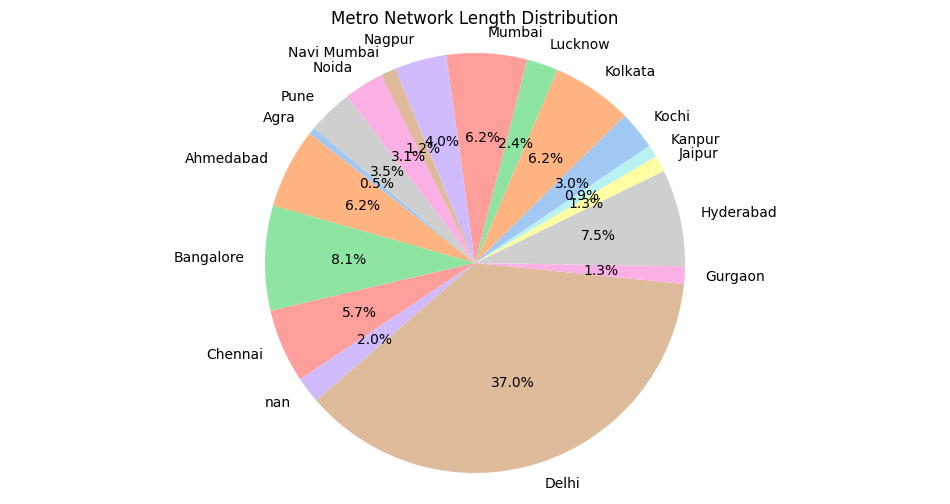

In [16]:
# 3. Pie Chart: Percentage Distribution of Metro Lengths
plt.figure(figsize=(12, 6))
plt.pie(indian_cities["System length( km)"], labels=indian_cities["City"], autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Metro Network Length Distribution")
plt.axis("equal")
plt.show()